In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2025-05-08 15:29:17.847946: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-08 15:29:17.848977: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 15:29:17.852980: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 15:29:17.865170: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746732557.885664  214848 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746732557.89

In [2]:
#shape of VAE is 38, 100, 100, 2, 100, 100 38

In [3]:
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['legend.fontsize'] = 13

Data preprocessing (same step for all methods):

In [4]:
data = pd.read_csv('../tsne_umap_tutorials/data/APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

# data = pd.read_csv('APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

In [5]:
# Spatial:
ra = data["RA"]   #APOGEE
dec = data["DEC"]   #APOGEE

# Identification:
apogee_ID = data["# APOGEE_ID_"]   #APOGEE
gaia_ID = data["GAIAEDR3_SOURCE_ID"]  # Gaia

# Kinematic:
parallax = data["GAIAEDR3_PARALLAX"]  # Gaia
pmra = data["GAIAEDR3_PMRA"]  # Gaia
pmra_err = data["GAIAEDR3_PMRA_ERROR"]  # Gaia
pmdec = data["GAIAEDR3_PMDEC"]  # Gaia
pmdec_err = data["GAIAEDR3_PMDEC_ERROR"]  # Gaia
RV = data["VHELIO_AVG"]   #APOGEE
RV_err = data["VERR"]   #APOGEE
#dist = data["dist"]   #APOGEE no dist in this dataset?
#dist_err = data["dist_err"]   #APOGEE
jr = data["jr"]   #APOGEE
jr_err = data["jr_err"]   #APOGEE
jz = data["jz"]   #APOGEE
jz_err = data["jz_err"]   #APOGEE
#jphi = data["jphi"]   #APOGEE no jphi in this dataset?
#jphi_err = data["jphi_err"]    #APOGEE

# # Spectral (useful for filtering):
TEFF_ERR = data["TEFF_ERR"]   #APOGEE
TEFF = data["TEFF"]   #APOGEE
LOGG_ERR = data["LOGG_ERR"]   #APOGEE
LOGG = data["LOGG"]   #APOGEE
SNR = data["SNR"]   #APOGEE
ASPCAPFLAG = data["ASPCAPFLAG"]
STARFLAG = data["STARFLAG"]

# # Chemical abundances from astroNN:
FE_H = data['FE_H'] 
C_FE = data['C_FE']
CI_FE = data['CI_FE']
N_FE = data['N_FE']
O_FE = data['O_FE']
MG_FE = data['MG_FE']
AL_FE = data['AL_FE']
SI_FE = data['SI_FE']
P_FE = data['P_FE']
S_FE = data['S_FE']
K_FE = data['K_FE']
CA_FE = data['CA_FE']
TI_FE = data['TI_FE']
TIII_FE = data['TIII_FE']
V_FE = data['V_FE']
CR_FE = data['CR_FE']
MN_FE = data['MN_FE']
CO_FE = data['CO_FE']
NI_FE = data['NI_FE']

# # Chemical abundance errors from astroNN:
FE_H_err = data["FE_H_ERR"] 
C_FE_err = data['C_FE_ERR']
CI_FE_err = data['CI_FE_ERR']
N_FE_err = data['N_FE_ERR']
O_FE_err = data['O_FE_ERR']
MG_FE_err = data['MG_FE_ERR']
AL_FE_err = data['AL_FE_ERR']
SI_FE_err = data['SI_FE_ERR']
P_FE_err = data['P_FE_ERR']
S_FE_err = data['S_FE_ERR']
K_FE_err = data['K_FE_ERR']
CA_FE_err = data['CA_FE_ERR']
TI_FE_err = data['TI_FE_ERR']
TIII_FE_err = data['TIII_FE_ERR']
V_FE_err = data['V_FE_ERR']
CR_FE_err = data['CR_FE_ERR']
MN_FE_err = data['MN_FE_ERR']
CO_FE_err = data['CO_FE_ERR']
NI_FE_err = data['NI_FE_ERR']

# # Number of stars in the initial sample of APOGEE DR16: 
print("There are {} stars in our initial sample".format(len(ra)))

cols = [ra, dec, apogee_ID, gaia_ID, parallax, pmra, pmra_err, pmdec, pmdec_err, RV, RV_err, #dist, dist_err,
         jr, jr_err,# jphi, jphi_err,
        jz, jz_err, TEFF, TEFF_ERR, LOGG, LOGG_ERR, SNR, ASPCAPFLAG, STARFLAG, FE_H, FE_H_err, C_FE, 
         C_FE_err, CI_FE, CI_FE_err, N_FE, N_FE_err, O_FE, O_FE_err, MG_FE, MG_FE_err, AL_FE, AL_FE_err, SI_FE,
         SI_FE_err, P_FE, P_FE_err, S_FE, S_FE_err, K_FE, K_FE_err, CA_FE, CA_FE_err, TI_FE, TI_FE_err, TIII_FE,
         TIII_FE_err, V_FE, V_FE_err, CR_FE, CR_FE_err, MN_FE, MN_FE_err, CO_FE, CO_FE_err, NI_FE, NI_FE_err]

There are 370060 stars in our initial sample


In [6]:
aspcapflags_filter = np.array(cols[20])==0
starflags_filter = np.array(cols[21])==0

filters = aspcapflags_filter*starflags_filter


filtered_data = []
for c in cols:
    a = np.array(c)[filters]
    filtered_data.append(a)
    
print("There are {} stars in our filtered sample".format(len(filtered_data[0])))

There are 144767 stars in our filtered sample


In [7]:
FE_H_filtered, C_FE_filtered, CI_FE_filtered = filtered_data[22], filtered_data[24], filtered_data[26]
N_FE_filtered, O_FE_filtered, MG_FE_filtered = filtered_data[28], filtered_data[30], filtered_data[32]
AL_FE_filtered, SI_FE_filtered, P_FE_filtered = filtered_data[34], filtered_data[36], filtered_data[38]
S_FE_filtered, K_FE_filtered, CA_FE_filtered = filtered_data[40], filtered_data[42], filtered_data[44]
TI_FE_filtered, TIII_FE_filtered, V_FE_filtered = filtered_data[46], filtered_data[48], filtered_data[50]
CR_FE_filtered, MN_FE_filtered, CO_FE_filtered, NI_FE_filtered = filtered_data[52], filtered_data[54], filtered_data[56], filtered_data[58]
RV_filtered  = filtered_data[9]

In [8]:
FE_H_err, C_FE_err, CI_FE_err = filtered_data[23], filtered_data[25], filtered_data[27]
N_FE_err, O_FE_err, MG_FE_err = filtered_data[29], filtered_data[31], filtered_data[33]
AL_FE_err, SI_FE_err, P_FE_err = filtered_data[35], filtered_data[37], filtered_data[39]
S_FE_err, K_FE_err, CA_FE_err = filtered_data[41], filtered_data[43], filtered_data[45]
TI_FE_err, TIII_FE_err, V_FE_err = filtered_data[47], filtered_data[49], filtered_data[51]
CR_FE_err, MN_FE_err, CO_FE_err, NI_FE_err = filtered_data[53], filtered_data[55], filtered_data[57], filtered_data[59]
RV_err  = filtered_data[10]

In [9]:
train_size = round(0.8 * len(filtered_data[0]))
test_size = round(0.1 * len(filtered_data[0]))
validation_size = round(0.1 * len(filtered_data[0]))

training_labels_raw = np.transpose(np.array([FE_H_filtered[:train_size], C_FE_filtered[:train_size], CI_FE_filtered[:train_size], 
                                        N_FE_filtered[:train_size], O_FE_filtered[:train_size], MG_FE_filtered[:train_size],
                                        AL_FE_filtered[:train_size], SI_FE_filtered[:train_size], P_FE_filtered[:train_size],
                                        S_FE_filtered[:train_size], K_FE_filtered[:train_size], CA_FE_filtered[:train_size],
                                        TI_FE_filtered[:train_size], TIII_FE_filtered[:train_size], V_FE_filtered[:train_size], 
                                        CR_FE_filtered[:train_size], MN_FE_filtered[:train_size], CO_FE_filtered[:train_size], NI_FE_filtered[:train_size]]))

error_training_labels_raw = np.transpose(np.array([FE_H_err[:train_size], C_FE_err[:train_size], CI_FE_err[:train_size], 
                                        N_FE_err[:train_size], O_FE_err[:train_size], MG_FE_err[:train_size],
                                        AL_FE_err[:train_size], SI_FE_err[:train_size], P_FE_err[:train_size],
                                        S_FE_err[:train_size], K_FE_err[:train_size], CA_FE_err[:train_size],
                                        TI_FE_err[:train_size], TIII_FE_err[:train_size], V_FE_err[:train_size], 
                                        CR_FE_err[:train_size], MN_FE_err[:train_size], CO_FE_err[:train_size], NI_FE_err[:train_size]]))


test_labels_raw = np.transpose(np.array([FE_H_filtered[train_size: train_size + test_size], C_FE_filtered[train_size: train_size + test_size], 
                                     CI_FE_filtered[train_size: train_size + test_size], N_FE_filtered[train_size: train_size + test_size],
                                     O_FE_filtered[train_size: train_size + test_size], MG_FE_filtered[train_size: train_size + test_size],
                                        AL_FE_filtered[train_size: train_size + test_size], SI_FE_filtered[train_size: train_size + test_size], 
                                     P_FE_filtered[train_size: train_size + test_size], S_FE_filtered[train_size: train_size + test_size], 
                                     K_FE_filtered[train_size: train_size + test_size], CA_FE_filtered[train_size: train_size + test_size],
                                        TI_FE_filtered[train_size: train_size + test_size], TIII_FE_filtered[train_size: train_size + test_size], 
                                     V_FE_filtered[train_size: train_size + test_size], CR_FE_filtered[train_size: train_size + test_size], 
                                     MN_FE_filtered[train_size: train_size + test_size], CO_FE_filtered[train_size: train_size + test_size], 
                                     NI_FE_filtered[train_size: train_size + test_size]]))
                                     
                                     
error_test_labels_raw = np.transpose(np.array([FE_H_err[train_size: train_size + test_size], C_FE_err[train_size: train_size + test_size], CI_FE_err[train_size: train_size + test_size], 
                                        N_FE_err[train_size: train_size + test_size], O_FE_err[train_size: train_size + test_size], MG_FE_err[train_size: train_size + test_size],
                                        AL_FE_err[train_size: train_size + test_size], SI_FE_err[train_size: train_size + test_size], P_FE_err[train_size: train_size + test_size],
                                        S_FE_err[train_size: train_size + test_size], K_FE_err[train_size: train_size + test_size], CA_FE_err[train_size: train_size + test_size],
                                        TI_FE_err[train_size: train_size + test_size], TIII_FE_err[train_size: train_size + test_size], V_FE_err[train_size: train_size + test_size], 
                                        CR_FE_err[train_size: train_size + test_size], MN_FE_err[train_size: train_size + test_size], CO_FE_err[train_size: train_size + test_size], NI_FE_err[train_size: train_size + test_size]]))


validation_labels_raw = np.transpose(np.array([FE_H_filtered[train_size + test_size: train_size + test_size + validation_size], C_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     CI_FE_filtered[train_size + test_size: train_size + test_size + validation_size], N_FE_filtered[train_size + test_size: train_size + test_size + validation_size],
                                     O_FE_filtered[train_size + test_size: train_size + test_size + validation_size], MG_FE_filtered[train_size + test_size: train_size + test_size + validation_size],
                                        AL_FE_filtered[train_size + test_size: train_size + test_size + validation_size], SI_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     P_FE_filtered[train_size + test_size: train_size + test_size + validation_size], S_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     K_FE_filtered[train_size + test_size: train_size + test_size + validation_size], CA_FE_filtered[train_size + test_size: train_size + test_size + validation_size],
                                        TI_FE_filtered[train_size + test_size: train_size + test_size + validation_size], TIII_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     V_FE_filtered[train_size + test_size: train_size + test_size + validation_size], CR_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     MN_FE_filtered[train_size + test_size: train_size + test_size + validation_size], CO_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     NI_FE_filtered[train_size + test_size: train_size + test_size + validation_size]]))
                                     
                                     
error_validation_labels_raw = np.transpose(np.array([FE_H_err[train_size + test_size: train_size + test_size + validation_size], C_FE_err[train_size + test_size: train_size + test_size + validation_size], CI_FE_err[train_size + test_size: train_size + test_size + validation_size], 
                                        N_FE_err[train_size + test_size: train_size + test_size + validation_size], O_FE_err[train_size + test_size: train_size + test_size + validation_size], MG_FE_err[train_size + test_size: train_size + test_size + validation_size],
                                        AL_FE_err[train_size + test_size: train_size + test_size + validation_size], SI_FE_err[train_size + test_size: train_size + test_size + validation_size], P_FE_err[train_size + test_size: train_size + test_size + validation_size],
                                        S_FE_err[train_size + test_size: train_size + test_size + validation_size], K_FE_err[train_size + test_size: train_size + test_size + validation_size], CA_FE_err[train_size + test_size: train_size + test_size + validation_size],
                                        TI_FE_err[train_size + test_size: train_size + test_size + validation_size], TIII_FE_err[train_size + test_size: train_size + test_size + validation_size], V_FE_err[train_size + test_size: train_size + test_size + validation_size], 
                                        CR_FE_err[train_size + test_size: train_size + test_size + validation_size], MN_FE_err[train_size + test_size: train_size + test_size + validation_size], CO_FE_err[train_size + test_size: train_size + test_size + validation_size], NI_FE_err[train_size + test_size: train_size + test_size + validation_size]]))


In [10]:
full_training_labels_raw = np.c_[training_labels_raw, error_training_labels_raw]
full_test_labels_raw = np.c_[test_labels_raw, error_test_labels_raw]
full_validation_labels_raw = np.c_[validation_labels_raw, error_validation_labels_raw]

In [11]:
full_training_labels_raw.shape, full_test_labels_raw.shape, full_validation_labels_raw.shape

((115814, 38), (14477, 38), (14476, 38))

In [12]:
np.min(full_training_labels_raw.T, axis=1), np.max(full_training_labels_raw.T, axis=1)

(array([-1.951497  , -2.1234312 , -2.119044  , -0.18978369, -0.7124527 ,
        -0.15558027, -0.47890055, -0.15707995, -0.97891414, -0.6047195 ,
        -2.2741165 , -0.40278423, -1.2907453 , -0.6157368 , -1.1658391 ,
        -1.391077  , -0.64225805, -3.6896837 , -0.2965148 ,  0.01358107,
         0.01762647,  0.02378747,  0.01708818,  0.01984493,  0.02071843,
         0.02232191,  0.01871411,  0.05818468,  0.01897749,  0.03516773,
         0.02518716,  0.02486172,  0.02255343,  0.0375476 ,  0.02254345,
         0.02762588,  0.01909786,  0.02221127]),
 array([5.7460123e-01, 8.3517190e-01, 5.6674075e-01, 3.6616602e+00,
        5.5585840e-01, 5.1025960e-01, 4.8934165e-01, 4.5210746e-01,
        7.5247210e+00, 9.0582700e-01, 1.0242985e+00, 2.7282690e-01,
        5.9501344e-01, 8.7636330e-01, 8.6697330e-01, 3.3210137e-01,
        3.5304812e-01, 5.6587050e-01, 2.1270613e-01, 4.5790780e-01,
        1.2761971e+00, 1.6784387e+00, 1.8850280e+01, 5.6260234e-01,
        5.5715760e-01, 6.7058295

In [13]:
err_threshold = 3 # remove errors that are larger than this...
err_mask_train = np.all(np.abs(full_training_labels_raw) < err_threshold, axis=1)
err_mask_test = np.all(np.abs(full_test_labels_raw) < err_threshold, axis=1)
err_mask_validation = np.all(np.abs(full_validation_labels_raw) < err_threshold, axis=1)

Remove unreasonably huge errors bars or unphysical abundance estimates:

In [14]:
full_training_labels = full_training_labels_raw[err_mask_train]
full_test_labels = full_test_labels_raw[err_mask_test]
full_validation_labels = full_validation_labels_raw[err_mask_validation]

In [15]:
full_training_labels.shape, full_test_labels.shape, full_validation_labels.shape

((114885, 38), (14374, 38), (14326, 38))

In [16]:
np.min(full_training_labels.T, axis=1), np.max(full_training_labels.T, axis=1)

(array([-1.8320073 , -1.2602895 , -2.119044  , -0.18978369, -0.7124527 ,
        -0.1388877 , -0.47890055, -0.13207644, -0.97891414, -0.5242982 ,
        -0.7713039 , -0.40278423, -1.2907453 , -0.6157368 , -1.1658391 ,
        -1.0536897 , -0.64225805, -1.1330373 , -0.2965148 ,  0.01358107,
         0.01762647,  0.02378747,  0.01708818,  0.01984493,  0.02071843,
         0.02232191,  0.01871411,  0.05818468,  0.01897749,  0.03516773,
         0.02518716,  0.02486172,  0.02255343,  0.0375476 ,  0.02254345,
         0.02762588,  0.01909786,  0.02221127]),
 array([0.57460123, 0.81556314, 0.56674075, 1.5901425 , 0.5558584 ,
        0.5102596 , 0.48934165, 0.45210746, 1.0318542 , 0.905827  ,
        1.0242985 , 0.262527  , 0.59501344, 0.8763633 , 0.8669733 ,
        0.27449507, 0.35304812, 0.5658705 , 0.21270613, 0.35667247,
        0.48992783, 1.637775  , 1.0633858 , 0.46304193, 0.43964195,
        0.55135024, 0.46292186, 2.998515  , 0.55373484, 2.87389   ,
        1.0069572 , 0.7626475 , 

In [17]:
from sklearn.preprocessing import StandardScaler

Manual scaler to standardize (equivalent to StandardScaler):

In [18]:
# standardized_pca_array = []
# standardization_means = np.zeros(len(np.array(x_df_transpose)))
# standardization_sigmas = np.zeros(len(np.array(x_df_transpose)))

# for i, param in enumerate(np.array(x_df_transpose)):
#     mean, sigma = np.mean(param), np.std(param)
#     norm = (param - mean)/sigma
#     standardized_pca_array.append(norm)
#     standardization_means[i] = mean
#     standardization_sigmas[i] = sigma

StandardScaler to standardize (same method for t-SNE/UMAP):

In [19]:
from sklearn.preprocessing import StandardScaler

# split abundances and errors into separate datasets
training_labels_abundances = full_training_labels[:, :19]
training_labels_errors = full_training_labels[:, 19:]

test_labels_abundances = full_test_labels[:, :19]
test_labels_errors = full_test_labels[:, 19:]

validation_labels_abundances = full_validation_labels[:, :19]
validation_labels_errors = full_validation_labels[:, 19:]

# standardize means fitting and transforming with standard scaler, standardize errors by scaling by the scale factor (mean will shift but this does not change the errors)
training_scaler = StandardScaler().fit(training_labels_abundances)
standardized_abundance_training_arr = training_scaler.transform(training_labels_abundances)
standardized_error_training_arr = training_labels_errors/training_scaler.scale_
standardized_full_training_arr = np.c_[standardized_abundance_training_arr, standardized_error_training_arr]

test_scaler = StandardScaler().fit(test_labels_abundances)
standardized_abundance_test_arr = test_scaler.transform(test_labels_abundances)
standardized_error_test_arr = test_labels_errors/test_scaler.scale_
standardized_full_test_arr = np.c_[standardized_abundance_test_arr, standardized_error_test_arr]

validation_scaler = StandardScaler().fit(validation_labels_abundances)
standardized_abundance_validation_arr = validation_scaler.transform(validation_labels_abundances)
standardized_error_validation_arr = validation_labels_errors/validation_scaler.scale_
standardized_full_validation_arr = np.c_[standardized_abundance_validation_arr, standardized_error_validation_arr]

VAE stuff:

Classes used in VAEs:

In [20]:
class Sampling(layers.Layer):
    """Uses (mean, log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        mean, log_var = inputs
        batch = tf.shape(mean)[0]
        dim = tf.shape(mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mean + tf.exp(0.5 * log_var) * epsilon

class mu_var(tf.keras.Layer):
    def call(self, x_mu, x_log_var):
        return tf.concat([x_mu, x_log_var], 1)

## Load all methods:

PCA:

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

n_params = len(training_labels_abundances.T)
# perform PCA
pca = PCA(n_components = 2)
# fit the pca using the training array
fit_pca = pca.fit(standardized_abundance_training_arr)

# transform the training array
train_pca = fit_pca.transform(standardized_abundance_training_arr)
reconstructed_abundance_training_arr = fit_pca.inverse_transform(train_pca)
# transform the test array
test_pca = fit_pca.transform(standardized_abundance_test_arr)
reconstructed_abundance_test_arr = fit_pca.inverse_transform(test_pca)
# compute MSE
pca_training_mse = np.mean(np.mean((standardized_abundance_training_arr - reconstructed_abundance_training_arr) ** 2, axis=-1)) * 1000
pca_test_mse = np.mean(np.mean((standardized_abundance_test_arr - reconstructed_abundance_test_arr) ** 2, axis=-1)) * 1000
pca_training_chi2 = np.mean(np.mean(((standardized_abundance_training_arr - 
                                      reconstructed_abundance_training_arr) ** 2)/(2 * standardized_error_training_arr ** 2), axis=-1)) * 1000
pca_test_chi2 = np.mean(np.mean(((standardized_abundance_test_arr - 
                                  reconstructed_abundance_test_arr) ** 2)/(2 * standardized_error_test_arr ** 2), axis=-1)) * 1000

In [34]:
pca_training_mse, pca_test_mse, pca_training_chi2, pca_test_chi2

(281.63877014335577, 274.1159919198752, 693.2386013784889, 733.8453479247756)

Naive and Modified VAE:

In [22]:
keras.utils.get_custom_objects().update({
    "Sampling": Sampling,
    "mu_var": mu_var
})

encoder_naive = tf.keras.models.load_model('encoder_naive_vae.keras')
decoder_naive = tf.keras.models.load_model('decoder_naive_vae.keras')
encoder_modified = tf.keras.models.load_model('encoder_modified_vae.keras')
decoder_modified = tf.keras.models.load_model('decoder_modified_vae.keras')

with open('naive_vae_history.pkl', 'rb') as f:
    naive_history = pickle.load(f)

with open('modified_vae_history.pkl', 'rb') as f:
    modified_history = pickle.load(f)

2025-05-01 17:10:09.094415: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Plot all:

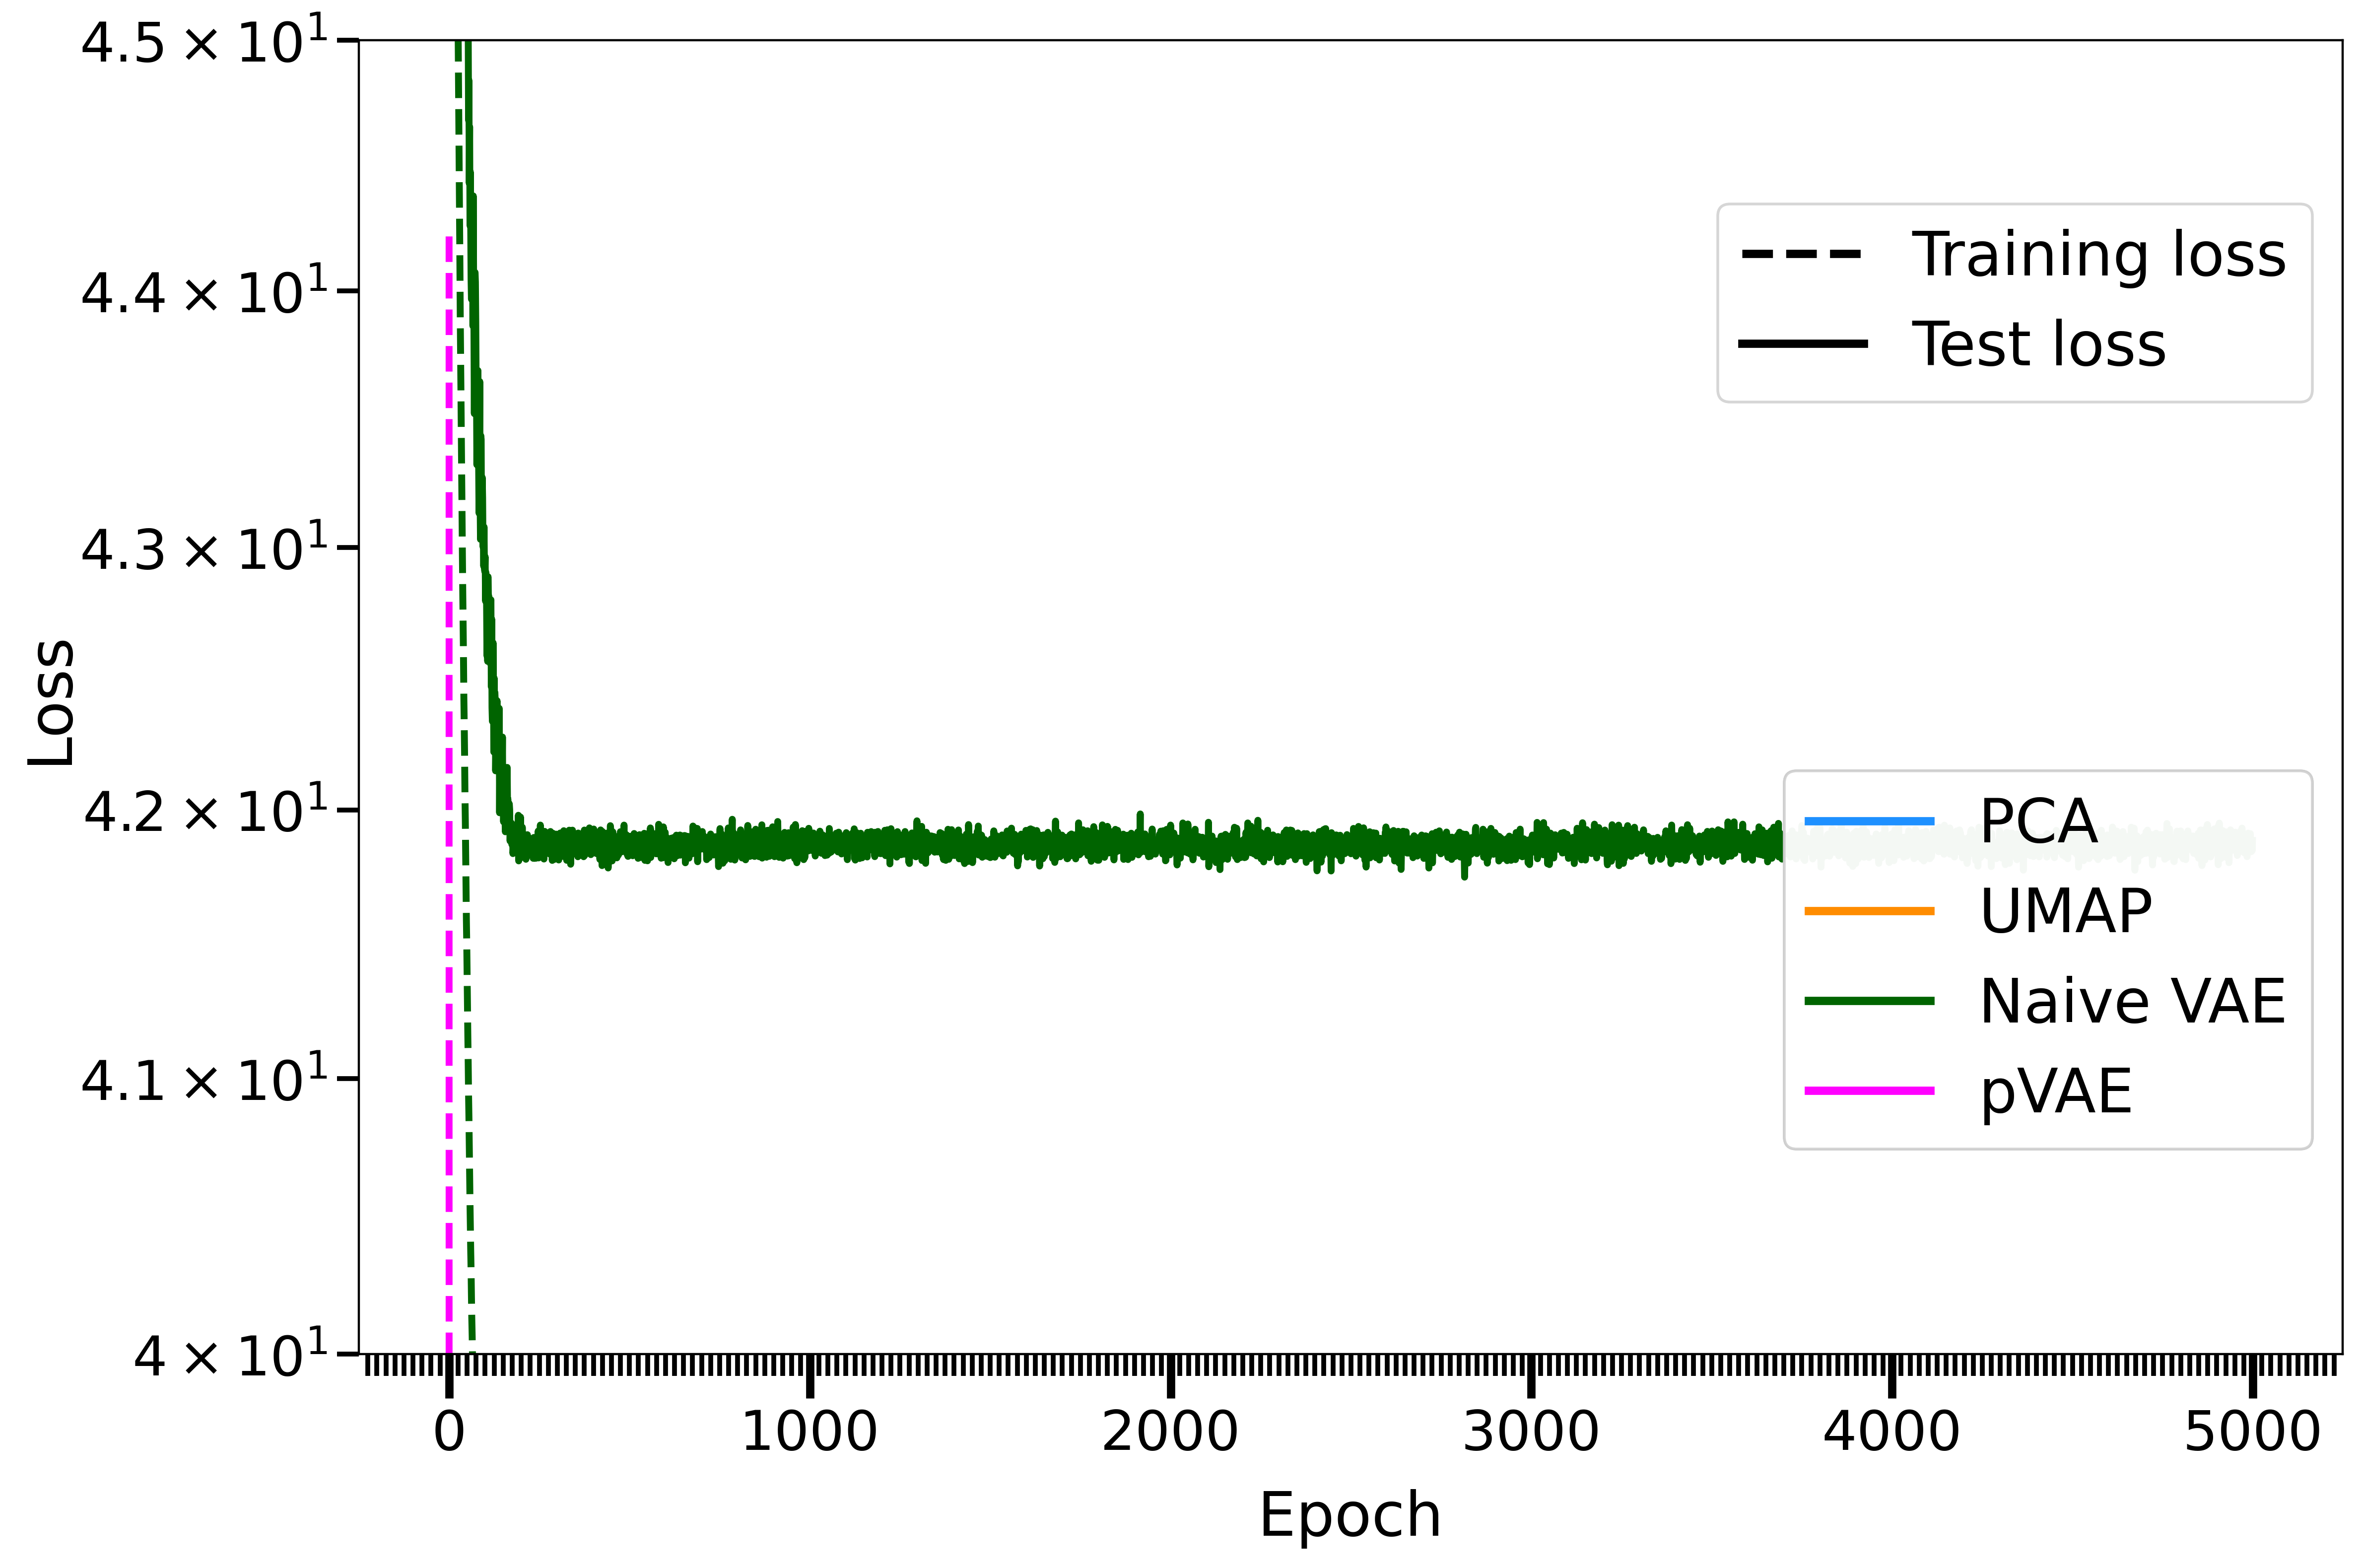

In [23]:
colors = ['dodgerblue', 'darkorange', 'forestgreen', 'fuchsia', 'indigo', 'brown', 'gold']
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(1, 1, figsize = (12, 8), dpi=400)
# plot PCA
plt.axhline(pca_training_mse, linewidth=2.5, color='dodgerblue', linestyle='dashed')
plt.axhline(pca_test_mse, linewidth=2.5, color='dodgerblue', linestyle='solid')
# naive VAE
plt.plot(naive_history['reconstruction_loss'], linewidth=2.5, color='darkgreen', linestyle='dashed')
plt.plot(naive_history['val_reconstruction_loss'], linewidth=2.5, color='darkgreen', linestyle='solid')
# modified VAE
plt.plot(modified_history['reconstruction_loss'], linewidth=2.5, color='fuchsia', linestyle='dashed')
plt.plot(modified_history['val_reconstruction_loss'], linewidth=2.5, color='fuchsia', linestyle='solid')
# dummy lines
# test/train
dl1, = plt.plot([], [], c='black', linestyle='solid', linewidth=3.)
dl2, = plt.plot([], [], c='black', linestyle='dashed', linewidth=3.)
# PCA, UMAP, naive VAE, pVAE
dl3, = plt.plot([], [], c='dodgerblue', linestyle='solid', linewidth=3.)
dl4, = plt.plot([], [], c='darkorange', linestyle='solid', linewidth=3.)
dl5, = plt.plot([], [], c='darkgreen', linestyle='solid', linewidth=3.)
dl6, = plt.plot([], [], c='fuchsia', linestyle='solid', linewidth=3.)
# scale
plt.yscale('log')
# plt.xscale('log')
# tick params
plt.tick_params('both', length=16, width=3., which='major', labelsize=20)
plt.tick_params('both', length=8, width=1.75, which='minor', labelsize=20)
ax.xaxis.set_minor_locator(MultipleLocator(25.))
# limit, label
# plt.xlim(0, 300)
plt.ylim(40, 45)
plt.xlabel('Epoch', fontsize=22, labelpad=10)
plt.ylabel('Loss', fontsize=22, labelpad=0)
# legend
l1 = plt.legend([dl2, dl1], ['Training loss', 'Test loss'], bbox_to_anchor=(1., 0.8), loc='right', fontsize=22)
l2 = plt.legend([dl3, dl4, dl5, dl6], [r'PCA', r'UMAP', r'Vanilla AE', r'pAE', r'sAE'], bbox_to_anchor=(1., 0.3), loc='right', fontsize=22)
ax.add_artist(l2)
ax.add_artist(l1)
# tight layout, save
plt.tight_layout()
plt.savefig('./paper_figures/loss_vs_epoch.png')